# K-najblizih suseda

## Predprocesiranje podataka

### Ucitavanje podataka

In [141]:
import pandas as pd

df = pd.read_csv('Data/iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [142]:
X = df.iloc[:,:2]
X

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [143]:
y = pd.factorize(df['variety'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Razdvajanje podataka na train/test skupove

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


### Normalizacija podataka

Racunamo srednju vrednost svih parametara i standardnu
devijaciju nad skupu za treniranje. Onda po formuli
$$\frac{X - \mu}{\sigma}$$
vrsimo normalizaciju nad trening i test skupu.

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Algoritam: k-najblizih suseda

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

confusion_matrix(y_test, model.predict(X_test))

array([[15,  0,  0],
       [ 0, 12,  3],
       [ 0,  7,  8]])

In [147]:
model.score(X_test, y_test)

0.7777777777777778

Probajmo sada da nadjemo bolje hiperparametre. To naravno, necemo raditi rucno vec cemo koristiti `GridSearchCV`

In [148]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': range(1, 11)},
    scoring='accuracy',
    cv=3
)

clf.fit(X_train, y_train)

clf.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [149]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[15,  0,  0],
       [ 0, 11,  4],
       [ 0,  8,  7]])

## Postprocesiranje podataka

Hocemo da napravimo grid pomocu koga cemo praviti mrezu
regiona koje predstavljaju svaku od vrsta.

In [150]:
import numpy as np

x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

step = 0.02
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
z

array([[1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

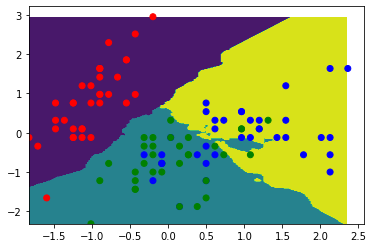

In [155]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.contourf(xx, yy, z)
plt.scatter(
    x=X_train[:,0], y=X_train[:,1], 
    c=y_train, cmap=ListedColormap(['red', 'green', 'blue'])
)